In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

In [10]:
data = fetch_california_housing(as_frame= True)
print(data.frame.head())

print(data.frame.describe())
print(data.feature_names)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23        4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22        3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24        3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25        3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25        3.422
             MedInc      HouseAge      AveRooms  ...      Latitude     Longitude   MedHouseVal
count  20640.000000  20640.000000  20640.000000  ...  20640.000000  20640.000000  20640.000000
mean       3.870671     28.639486      5.429000  ...     35.631861   -119.569704      2.068558
std        1.899822     12.585558      2.474173  ...      2.135952      2.003532      1.153956
min        0.499900      1.000000     

In [11]:
X = data.frame[['MedInc']]
y = data.frame['MedHouseVal']

print(X.head())
print(y.head())


   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

Training set size: 16512, Test set size: 4128


In [18]:
model = LinearRegression().fit(X_train, y_train)#trains the model
y_pred = model.predict(X_test)#predicts it against pre-partitioned test dataset


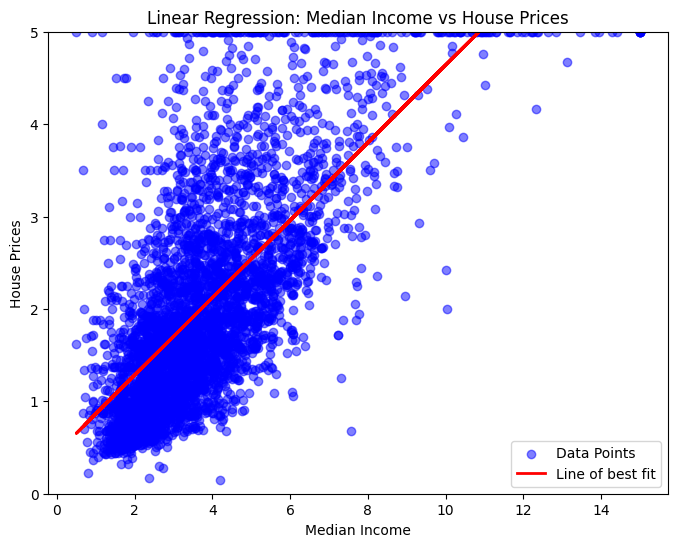

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha = 0.5 ,label='Data Points')
plt.plot(X_test, y_pred, color='red',linewidth=2, label= 'Line of best fit')
plt.ylim(0,5) #setting y-axis max to 5
plt.xlabel('Median Income')
plt.ylabel('House Prices')
plt.title('Linear Regression: Median Income vs House Prices')
plt.legend()
plt.show()

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
ridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.4f}")#tells my model not to be too smart, dont overfit



Mean Squared Error (Ridge Regression): 0.7091


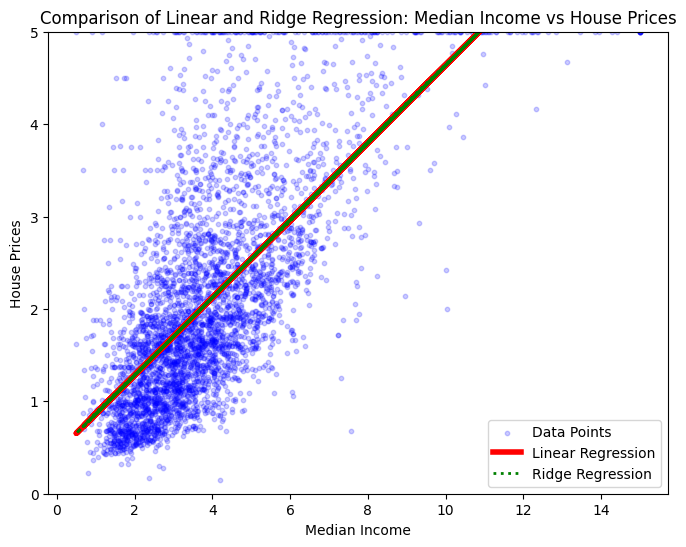

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha = 0.2,s=10 ,label='Data Points')
plt.plot(X_test, y_pred, color='red',linewidth=4, label= 'Linear Regression')
plt.plot(X_test, y_pred_ridge, color='green',linestyle = 'dotted', linewidth=2, label= 'Ridge Regression')
plt.ylim(0,5) #setting y-axis max to 5
plt.xlabel('Median Income')
plt.ylabel('House Prices')
plt.title('Comparison of Linear and Ridge Regression: Median Income vs House Prices')
plt.legend()
plt.show()

In [33]:
iris = load_iris(as_frame=True)
print(iris.frame.head())
print(iris.feature_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                5.1               3.5                1.4               0.2       0
1                4.9               3.0                1.4               0.2       0
2                4.7               3.2                1.3               0.2       0
3                4.6               3.1                1.5               0.2       0
4                5.0               3.6                1.4               0.2       0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
X = iris.data[['sepal length (cm)','sepal width (cm)']]
y = iris.target

print(X.head())
print(y.head())


   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [40]:
X_scaled =StandardScaler().fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_scaled,y)

In [46]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


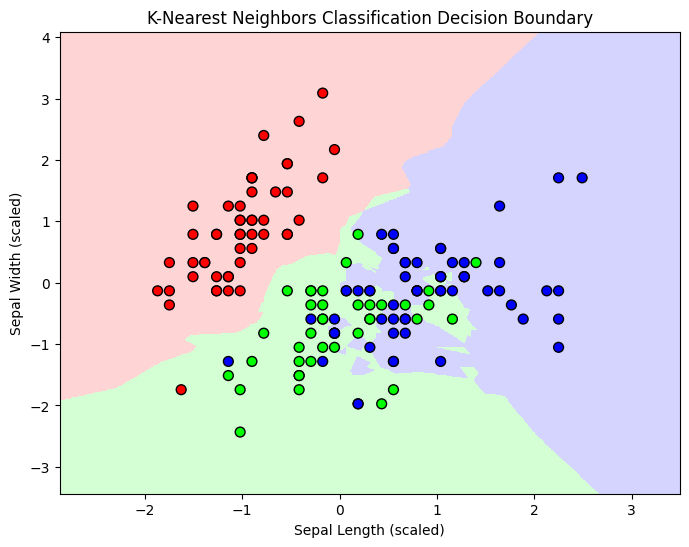

In [50]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)#we have 10k data points, 2D this is saying it will flatten it
#so going from 1D to 2D and be able to plot in an X Y Graph
#knn.predict(np.c_[xx.ravel(), yy.ravel()]): This part takes the coordinates of the mesh grid (flattened to a 1D array) as input to predict the class labels.

#.reshape(xx.shape): This part reshapes the predicted labels to match the original shape of the grid.

#You end up with a 2D array of predicted class labels that matches the shape of the original mesh grid
plt.figure(figsize=(8,6))
plt.pcolormesh(xx, yy, Z, alpha=0.5, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolors='k', s=50)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Nearest Neighbors Classification Decision Boundary')
plt.show()